In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

In [3]:
av = np.load('I_355_tgextmap.npz')
level = 7
av.files

['HPId', 'HPlevel', 'A0', 'e_A0', 'Ntracers']

In [4]:
mask = av['HPlevel'] == level

In [5]:
av['HPId'][mask]

array([ 13544,   1064,   8224, ..., 164889, 164890, 164891], dtype=int32)

In [6]:
NSIDE = 2**level
NPIX = hp.nside2npix(NSIDE)
print(NPIX)
print(hp.nside2resol(NSIDE, arcmin=True))
m = np.zeros(NPIX)

196608
27.483891294539248


In [7]:
m[av['HPId'][mask]] = av['A0'][mask]

In [8]:
m

array([0.2784, 0.4765, 0.119 , ..., 0.2676, 0.3586, 0.2338])

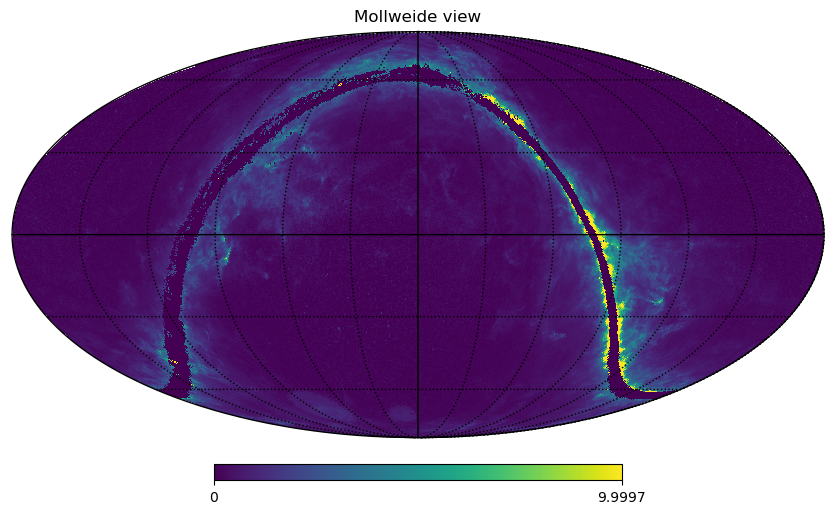

In [9]:
hp.mollview(m, nest=True)
hp.graticule()